In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("C:/Users/HP/Downloads/UK_monthly.csv")
data.shape

(36, 2)

In [3]:
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Period  36 non-null     object 
 1   GDP Growth   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [7]:
data.isnull().sum()

Time Period    0
GDP Growth     0
dtype: int64

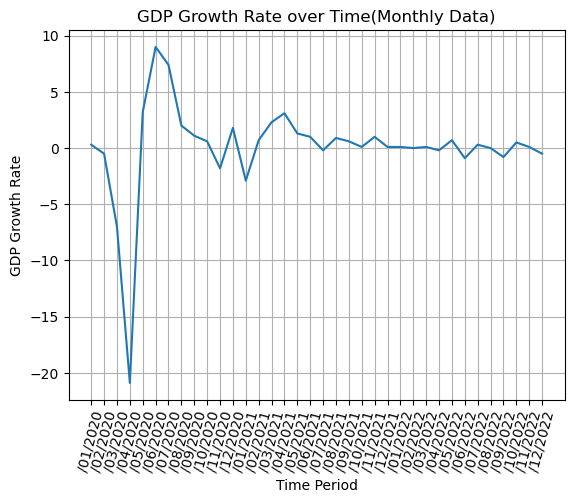

In [9]:
plt.plot(data['Time Period'], data['GDP Growth'])
plt.xlabel('Time Period')
plt.ylabel('GDP Growth Rate')
plt.xticks(rotation = 75)
plt.title('GDP Growth Rate over Time(Monthly Data)')
plt.grid(True)
plt.show()

In [11]:
data['Time Period'] = pd.to_datetime(data['Time Period'])
data.set_index('Time Period', inplace=True) 
quarterly_data = data.resample('Q').mean()  # Using 'Q' for quarterly frequency
quarterly_data.reset_index(inplace=True)
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))
quarterly_data['Recession'].fillna(False, inplace=True)
quarterly_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20424\851968122.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Period'] = pd.to_datetime(data['Time Period'])
C:\Users\HP\AppData\Local\Temp\ipykernel_20424\851968122.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = data.resample('Q').mean()  # Using 'Q' for quarterly frequency
C:\Users\HP\AppData\Local\Temp\ipykernel_20424\851968122.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: 

,Time Period,GDP Growth,Recession
0,2020-03-31,-2.400000,False
1,2020-06-30,-2.900000,True
2,2020-09-30,3.500000,False
3,2020-12-31,0.200000,False
4,2021-03-31,0.033333,False


In [13]:
recession_periods = quarterly_data.loc[quarterly_data['Recession'] == True, 'Time Period'].tolist()

print(recession_periods)

[Timestamp('2020-06-30 00:00:00'), Timestamp('2022-09-30 00:00:00')]


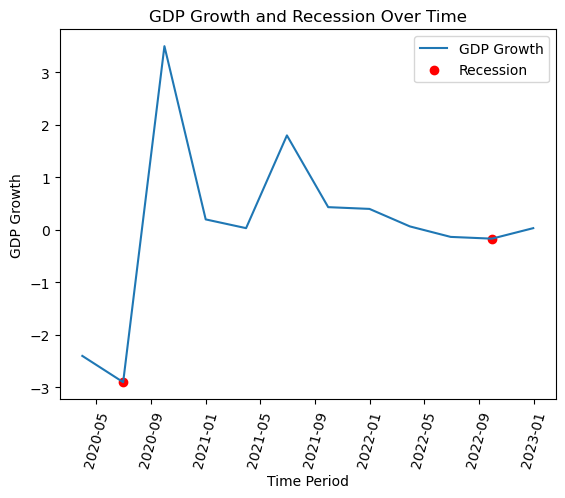

In [15]:
recession_data = quarterly_data[quarterly_data['Recession'] == True]
plt.plot(quarterly_data['Time Period'], quarterly_data['GDP Growth'], label='GDP Growth')
plt.scatter(recession_data['Time Period'], recession_data['GDP Growth'], color='Red', label='Recession')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.xticks(rotation=75)
plt.title('GDP Growth and Recession Over Time')
plt.legend()
plt.show()